
In this notebook,  we will train two Random Forest models using the original data and using the reduced-dimensional data respectively. 

For this, we are using the **red wine Dataset** supplied on the UCI Machine Learning webpage.

As per the **red wine Dataset's** details on the UCI Machine Learning webpage, the data contains **11 input variables (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol)**, and **1 output variable (quality)**. All the variables are **numeric**.

All the tasks to be performed are divided into the following sections.
<br>     

* **TASK A: Data loading, and visualization**
         a1. Reading the data, seeing the first few lines and displaying the features
         a2. Plotting histograms for all the features
         a3. Performing data preparation and splitting(85/15 split) the dataset into training and test sets
* **TASK B: Random Forest Regressor on full dimensional data**
         b1. Implementing RF regressor with appropriate hyperparameters on full dimensional data
         b2. Computing MAEs on training and test sets
         b3. Plotting raw prediction errors 
* **TASK C: Feature importance & dimensionality reduction**
         c1. Extracting the feature importances
         c2. Reducing the dimensions of the features
* **TASK D: Random Forest Regression on reduced-dimensional data**
         d1. Implementing RF regressor with appropriate hyperparameters on reduced dimensional data
         d2. Computing MAEs on training and test sets
         d3. Plotting raw prediction errors
* **TASK E: Comparison and conclusion**

Let us peform the tasks.

### TASK A: &emsp; Data loading, and visualization
###### a1. &emsp; The below code is to read the data, hard code the column headings, display the features and see the first few lines of the dataset.

In [1]:
import os
import pandas as pd
import numpy as np

cwd = os.getcwd()   #get the current working directory
newpath = os.path.join(cwd,'winequality-red.csv')  #retrieving the path of the dataset file
df2 = pd.read_csv(newpath, sep=';')    #reading the dataset to the dataframe df
df2.head()    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df2.info()
df2.isnull().values.any()   #checking for any null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


False

In [3]:
df2.describe()  #displaying the summary of the numeric attributes 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
value_counts = df2['quality'].value_counts()
print("The number of instances of each quality are as below \n",value_counts)  #counting the unique values in the 'quality' attribute

The number of instances of each quality are as below 
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


From the summary, we can see that **sulfur dioxide (both free and total)** is distributed over a wide range across the samples. **quality** of the samples range from 3 to 8, with 6 being the median. **pH** value varies from 2.740 to 4.010 with a median being 3.311. **citric acid** has a minimum value of 0 and the majority of the percentiles with least values.
###### a2. &emsp; Plotting histograms for all the features

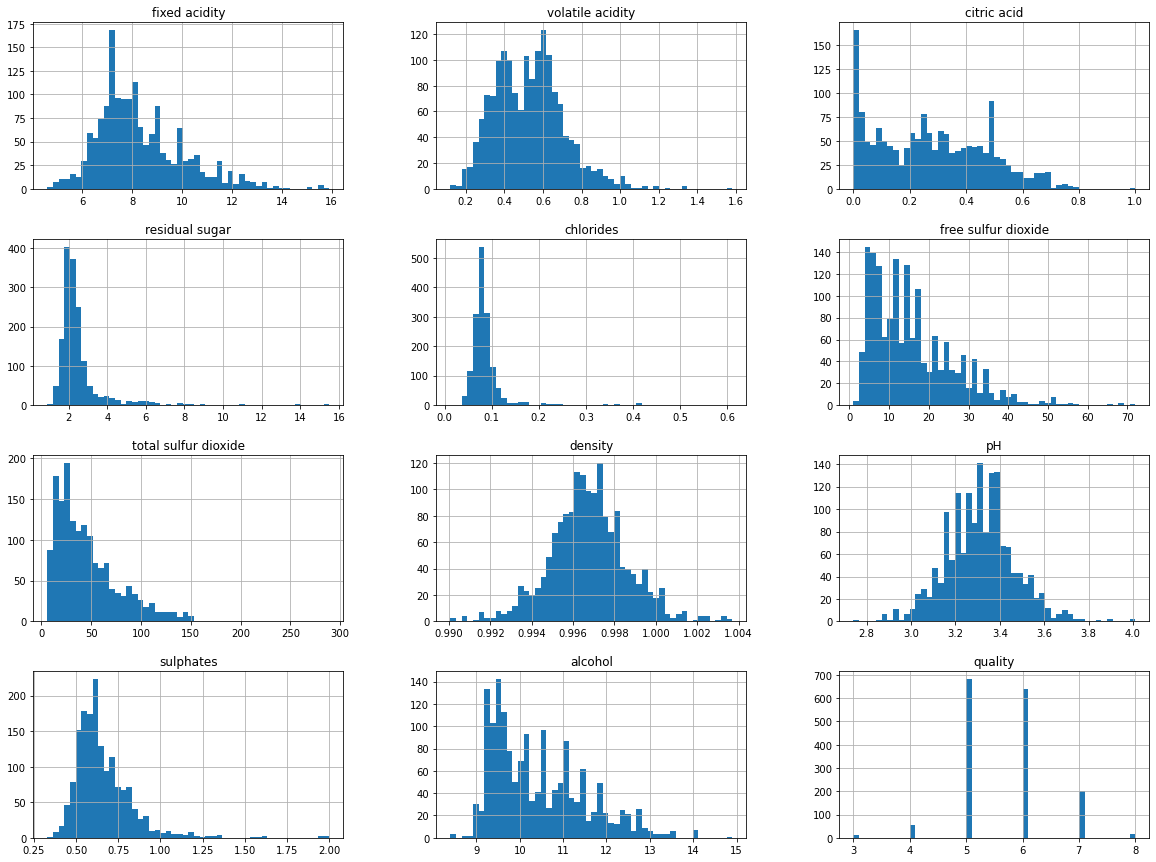

In [5]:
# plotting histograms for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
df2.hist(bins=50, figsize=(20,15))   #plotting histograms for all the numeric columns
plt.show()

From the histograms, we can see that **fixed acidity** has a positively skewed distribution. **volatile acidity** distribution looks like bimodel with two peaks at 0.4 and 0.6. **citric acid** is skewed to the right and the mode is 0.  
**residual sugar** is positively skewed with high peaks at around 2.3 with many outliers present at higher ranges. The distribution is like long-tailed to the right. **chlorides** distribution is similar to the residual sugar. For **free sulfur dioxide**, there is a high peak at 7 but then it again follows the same positively skewed. **total sulfur dioxide** follows the similar pattern.  
**density** has an almost perfect normal distribution. **pH** has a very normally distributed shape. **sulphates** has a long-tailed distribution like chlorides or fee/total sulfur dioxide. **alcohol** has a skewed distribution.  
**quality** has a semi-normal discrete distribution of data.

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


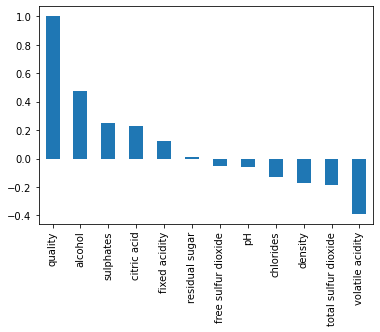

In [6]:
#calculating correlations
correlations = df2.corr()['quality'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

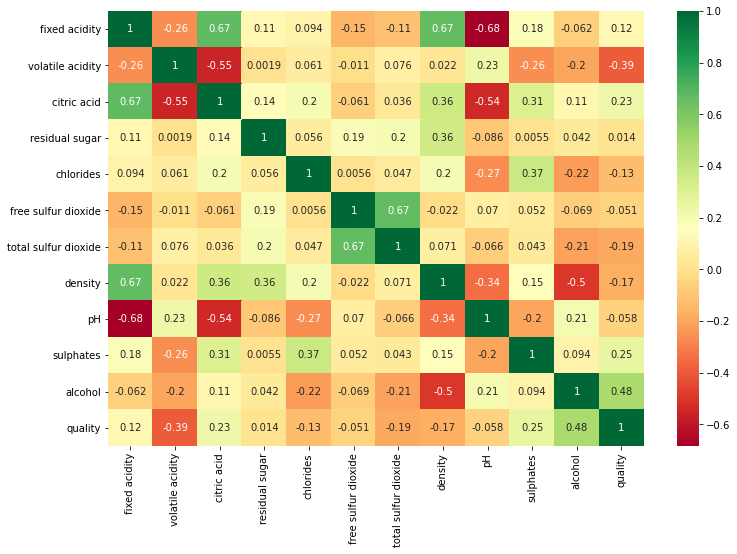

In [7]:
import seaborn as sns

x = df2.iloc[:,0:11]    #input columns of the dataset
y = df2.iloc[:,-1]    #output column of the dataset (here it is 'quality')

cormatrix = df2.corr()    #retrieving the correlations of all the features in the dataset
best_corr_features = cormatrix.index
plt.figure(figsize=(12,8))

hmap = sns.heatmap(df2[best_corr_features].corr(), annot = True, cmap = "RdYlGn")    #plotting the heatmap

From the above correlation matrix, we can observe that some obvious feature correlations such as acidity and pH. We can also observe that approximately half of these features correlate positively with quality, while the other half correlate negatively. For example, we can see a high degree of positive correlation between alcohol and quality whereas we can see a negative correlation between density and quality. With increase in density, the quality decreases.

###### a3. &emsp; Performing data preparation and splitting(85/15 split) the dataset into training and test sets

In [8]:
#splitting the data to train and test sets using 85/15 split
#to make this notebook's output identical at every run
np.random.seed(10)

#dividing data into attributes and labels
#x2 = df2.drop('quality', axis=1)
#y2 = df2.quality

x2 = df2.iloc[:,0:11].values    #input columns of the dataset
y2 = df2.iloc[:,-1:].values    #output column of the dataset (here it is 'quality')

# Saving feature names for later use
feature_list = list(df2.columns)

#splitting data to train and test sets
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.15, random_state=10)

print("The number of instances in the dataset are : ", len(df2))
print("The number of instances in the training set are: ", len(x2_train))
print("The number of instances in the test set are : ", len(x2_test))

The number of instances in the dataset are :  1599
The number of instances in the training set are:  1359
The number of instances in the test set are :  240


We are not implementing **Feature Scaling** on the data. For **RandomForests, scaling is not necessary** as it is a tree-based model. As the algorithm requires partitioning, even if you apply normalization then also the **result would be the same**. Also, RandomForests uses information gain/gini coefficient inherently which will not be affected by scaling.

### TASK B: &emsp; RandomForest Regressor on full-dimensional data
###### b1, b2, & b3 . &emsp; Implementing RF regressor with appropriate hyperparameters on full dimensional data, Computing MAEs on training and test sets, and Plotting raw prediction errors 
We now implement the **RandomForest Regressor** on our data. To reduce the problem of overfitting our model, we need to fine-tune our parameters. In our GridSearch, we are using the parameters **n_estimators, criterion, max_depth, and max_features** as our parameter grid.  
* **n_estimators** is the number of trees in the forest. The **default = 100**.
* **criterion** is the function to measure the quality of the split. It can be 'mse' or 'mae'. The **Default is mse**.
* **max_depth** is the maxmimum depth of the tree. The **default is None**. 
In the below code, we are to choose **n_estimators as 4, 5** and **criterion as 'mae'** . We've experimented with different combinations of values for the parameters **max_features**['auto','sqrt','log2'], **max_depth**[5,3,1]. For the **RandomForest Regressor**, we are using the 'neg_mean_absolute_error' as a scoring parameter as we need to report the MAEs(Mean Absolute Errors) for the model.

In [9]:
# Training and prediction process for full-dimensional data
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#param_grid1 = {'n_estimators':[4,5], 'criterion':['mae'],'max_features':['auto','sqrt','log2']}
param_grid1 = {'n_estimators':[4,5], 'criterion':['mae'], 'max_depth':[5,3,1],'max_features':['auto','sqrt','log2']}

reg_model = GridSearchCV(RandomForestRegressor(random_state=10),param_grid1, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
#training the random forest regressor
reg_model.fit(x2_train,y2_train.ravel())

print("\033[1mThe best estimator is:\033[0m", reg_model.best_estimator_)
print("\033[1mThe best parameters are %s with a score of %0.2f\033[0m" %(reg_model.best_params_, reg_model.best_score_),"\n")   #displaying the best parameter values after tuning

from sklearn.metrics import mean_absolute_error,accuracy_score
y2_pred = reg_model.predict(x2_train)   #predictions on train set
y2_pred = np.rint(y2_pred)    #rounding the predictions
y2_pred = y2_pred.astype(int)  #type casting the predictions to integer

#printing MAEs of the original(full dimensional) training and test data
from sklearn.model_selection import cross_val_score
#MAEs of training data
train_scores = cross_val_score(reg_model, x2_train, y2_train.ravel(), scoring='neg_mean_absolute_error', cv=5)
print("MAEs of the original training set are", train_scores)
print("\033[1mMean Absolute error for the whole full-dimensional training set is:\033[0m",mean_absolute_error(y2_train, y2_pred))  #MAE for train data
print("Accuracy of training set is:",accuracy_score(y2_train, y2_pred))   #accuracy for train data

y2_pred2 = reg_model.predict(x2_test)    #predictions on test set
y2_pred2 = np.rint(y2_pred2)    #rounding the predictions
y2_pred2 = y2_pred2.astype(int)   #typecasting the predictions
#MAEs of test data  
test_scores = cross_val_score(reg_model, x2_test, y2_test.ravel(), scoring='neg_mean_absolute_error', cv=5)
print("MAEs of the original test set are", test_scores)
print("\033[1mMean Absolute error for the whole full-dimensional test set is:\033[0m",mean_absolute_error(y2_test,y2_pred2))  #MAE for test data
print("Accuracy of test set is:", accuracy_score(y2_test, y2_pred2))   #accuracy for test data


The best estimator is: RandomForestRegressor(criterion='mae', max_depth=5, n_estimators=4,
                      random_state=10)
The best parameters are {'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 4} with a score of -0.49 

MAEs of the original training set are [-0.50367647 -0.50275735 -0.48823529 -0.47647059 -0.47822878]
Mean Absolute error for the whole full-dimensional training set is: 0.4370860927152318
Accuracy of training set is: 0.5908756438557763
MAEs of the original test set are [-0.671875   -0.5125     -0.42083333 -0.58541667 -0.5       ]
Mean Absolute error for the whole full-dimensional test set is: 0.5041666666666667
Accuracy of test set is: 0.5583333333333333


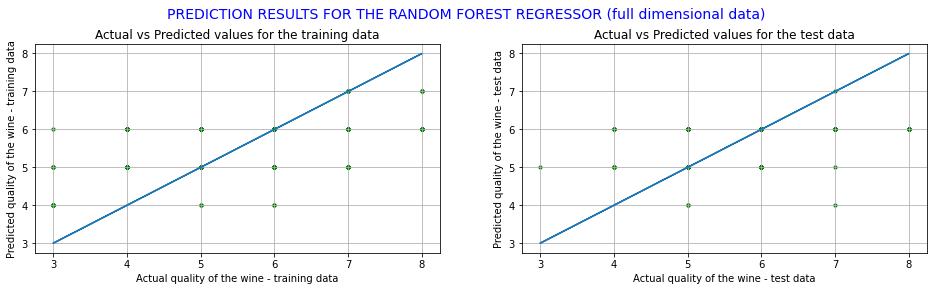

In [10]:
#plotting the prediction results for the full dimensional data
import matplotlib.pyplot as plt
#creating a grid for subplots
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)

#plotting subplots
#plot 1:
ax3 = plt.subplot(1,2,1)
plt.plot(y2_test, y2_test)
ax3.scatter(y2_train, y2_pred, s=10, c="green")
ax3.set_title("Actual vs Predicted values for the training data")
ax3.set_xlabel("Actual quality of the wine - training data")
ax3.set_ylabel("Predicted quality of the wine - training data")
ax3.grid(True)

#plot 2:
ax4 = plt.subplot(1,2,2)
plt.plot(y2_test, y2_test)
plt.scatter(y2_test, y2_pred2, s=10, c="green")
ax4.set_title("Actual vs Predicted values for the test data")
ax4.set_xlabel("Actual quality of the wine - test data")
ax4.set_ylabel("Predicted quality of the wine - test data")
ax4.grid(True)

plt.suptitle("PREDICTION RESULTS FOR THE RANDOM FOREST REGRESSOR (full dimensional data)", fontsize=14, color="blue")
plt.subplots_adjust(top=0.85)
plt.show()

### TASK C: &emsp; Feature importance & dimensionality reduction
###### c1, & c2 . &emsp; Extracting the feature importances, and Reducing the dimensions of the features
We now find out the feature importances of our model using the SelectFromModel() function from the sklearn.feature_selection package. Then, we will extract all the features with importance values above 5% (i.e., a threshold of above 0.05). With the freshly created data subset, we will train our model for the reduced-dimensional data.

In [11]:
from sklearn.feature_selection import SelectFromModel
print("\033[1mThe feature importances values for our model are as below: \033[0m")
for feature in zip(df2.columns,reg_model.best_estimator_.feature_importances_):
    print(feature)

sfm = SelectFromModel(reg_model.best_estimator_, threshold=0.05)
sfm.fit(x2_train,y2_train.ravel())

#printing the features with threshold of 0.05
print("\n\033[1mThe features with importance value above 5% (0.05) are below: \033[0m")
for feature_list_index in sfm.get_support(indices=True):
    print(df2.columns[feature_list_index])

#creating a data subset with only the features with threshold of 0.05
train_important = sfm.transform(x2_train)  #reduced-dimensional training data
test_important = sfm.transform(x2_test)    #reduced-dimensional test data

#training the random forest regressor on reduced-dimensional data
reg_model.fit(train_important,y2_train.ravel())   #reduced-dimensional, hyperparameter tuned model


The feature importances values for our model are as below: 
('fixed acidity', 0.023281654693021913)
('volatile acidity', 0.08702923726316548)
('citric acid', 0.004983455360339782)
('residual sugar', 0.010595898526933028)
('chlorides', 0.015838662390386525)
('free sulfur dioxide', 0.021930133739178966)
('total sulfur dioxide', 0.03857068280478434)
('density', 0.03136491277627994)
('pH', 0.015234851441747905)
('sulphates', 0.06748328274060386)
('alcohol', 0.6836872282635582)

The features with importance value above 5% (0.05) are below: 
volatile acidity
sulphates
alcohol


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['mae'], 'max_depth': [5, 3, 1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [4, 5]},
             scoring='neg_mean_absolute_error')

### TASK D: &emsp; RandomForest Regressor on reduced-dimensional data
###### d1, & d2. &emsp; Implementing RF regressor with appropriate hyperparameters on reduced dimensional data, Computing MAEs on training and test sets.

In [12]:
# Training and prediction process for reduced-dimensional data

from sklearn.metrics import mean_absolute_error, accuracy_score
y2_pred_reduced = reg_model.predict(train_important)   #predictions on reduced-dimensional train data
y2_pred_reduced = np.rint(y2_pred_reduced)   #rounding the predictions
y2_pred_reduced = y2_pred_reduced.astype(int)   #typecasting

#printing MAEs of the original(full dimensional) training and test data
from sklearn.model_selection import cross_val_score
#MAEs of training data
red_train_scores = cross_val_score(reg_model, train_important, y2_train.ravel(), scoring='neg_mean_absolute_error', cv=5)
print("MAEs of the reduced-dimensional training set are", red_train_scores)
print("\033[1mMean Absolute error for the whole reduced-dimensional training set is:\033[0m", mean_absolute_error(y2_train, y2_pred_reduced))  #MAE of train data
print("Accuracy of reduced dimension training set is:", accuracy_score(y2_train, y2_pred_reduced))  #accuracy of train data

y2_pred2_reduced = reg_model.predict(test_important)    #predictions on test set
y2_pred2_reduced = np.rint(y2_pred2_reduced)    #rounding the predictions
y2_pred2_reduced = y2_pred2_reduced.astype(int)  #typecasting the predictions

#MAEs of test data
red_test_scores = cross_val_score(reg_model, test_important, y2_test.ravel(), scoring='neg_mean_absolute_error', cv=5)
print("MAEs of the reduced-dimensional test set are", red_test_scores)
print("\033[1mMean Absolute error for the whole reduced-dimensional test set is:\033[0m",mean_absolute_error(y2_test,y2_pred2_reduced))  #MAE for test data
print("Accuracy of reduced dimension test set is:", accuracy_score(y2_test, y2_pred2_reduced))   #accuracy for test data




MAEs of the reduced-dimensional training set are [-0.50441176 -0.50330882 -0.47794118 -0.48014706 -0.47306273]
Mean Absolute error for the whole reduced-dimensional training set is: 0.4392935982339956
Accuracy of reduced dimension training set is: 0.5908756438557763
MAEs of the reduced-dimensional test set are [-0.56666667 -0.53541667 -0.546875   -0.5625     -0.515625  ]
Mean Absolute error for the whole reduced-dimensional test set is: 0.5125
Accuracy of reduced dimension test set is: 0.5458333333333333


As can be seen by the accuracy scores, our original model which contains all the features is 55% accurate while our reduced-dimensional model that contained limited features is 54% accurate. Thus, for a small cost in accuracy, we halved the number of features in the model.
###### d3. &emsp; Plotting prediction results and raw prediction errors

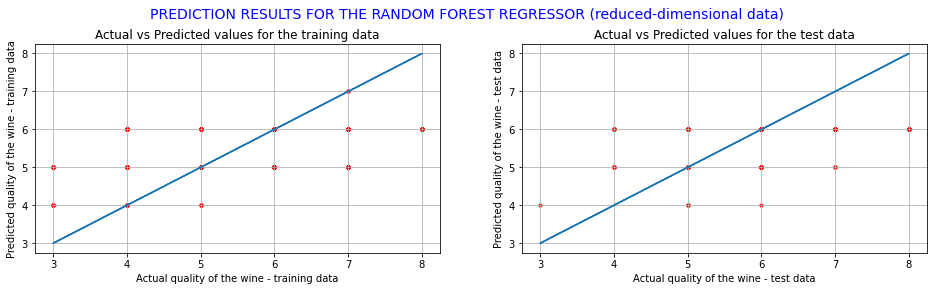

In [13]:
#plotting the prediction results for reduced-dimensional data
import matplotlib.pyplot as plt
#creating a grid for subplots
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)

#plotting subplots
#plot 1:
ax5 = plt.subplot(1,2,1)
ax5.plot(y2_test, y2_test)
ax5.scatter(y2_train, y2_pred_reduced, s=10, c="red")
ax5.set_title("Actual vs Predicted values for the training data")
ax5.set_xlabel("Actual quality of the wine - training data")
ax5.set_ylabel("Predicted quality of the wine - training data")
ax5.grid(True)

#plot 2:
ax6 = plt.subplot(1,2,2)
ax6.plot(y2_test, y2_test)
ax6.scatter(y2_test, y2_pred2_reduced, s=10, c="red")
ax6.set_title("Actual vs Predicted values for the test data")
ax6.set_xlabel("Actual quality of the wine - test data")
ax6.set_ylabel("Predicted quality of the wine - test data")
ax6.grid(True)

plt.suptitle("PREDICTION RESULTS FOR THE RANDOM FOREST REGRESSOR (reduced-dimensional data)", fontsize=14, color="blue")
plt.subplots_adjust(top=0.85)
plt.show()

(array([[  1.,   8., 108., ...,   7.,   0.,   0.],
        [  0.,   1.,   8., ...,  27.,   7.,   0.],
        [  0.,   1.,   8., ...,  27.,   7.,   0.],
        ...,
        [  0.,   0.,   1., ...,  89.,  27.,   7.],
        [  0.,   1.,   8., ...,  27.,   7.,   0.],
        [  0.,   1.,   8., ...,  27.,   7.,   0.]]),
 array([-3. , -2.3, -1.6, -0.9, -0.2,  0.5,  1.2,  1.9,  2.6,  3.3,  4. ]),
 <a list of 240 Lists of Patches objects>)

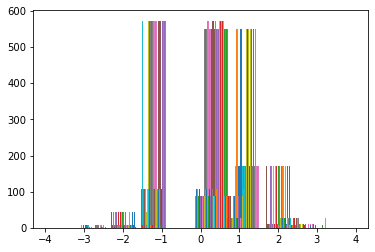

In [14]:
#plotting distributions of raw errors on train set
plt.hist(y2_train - y2_pred_reduced)
#plotting distributions of raw errors on test set
plt.hist(y2_test - y2_pred2_reduced)


From the above prediction results, we can observe that the number of true predicitions are more for the test data when compared to the predictions on the training data. 

### TASK E: &emsp; Comparison and conclusion
From the **MAEs** of the full-dimensional data we can see that the training set has a MAE score of 43% where as the test set has a MAE score of 50%. For the reduced-dimensional data, we can see that the training set has a MAE score of 43% but the test set's MAE score is 51%. From the above scores, we can say that the **Random Forest Regressor model performs better on the test data, which is good and expected**. The same can be observed when we look at the prediction results plots of both the full and reduced-dimensional data. We were able to get good accuracy with the Random Forest Regressor. 
Based on the above predictions and plots, we come to a conclusion that not all input features are essential and affect the data. For example, from the correlation matrix of quality and residual sugar we can see that as the quality increases, residual sugar is moderate and doesnot have any change drastically. So, this feature is not so essential as compared to the others like alcohol and citric acid.  
**This experimental run with full and reduced-dimensional data shows that quality of the wine is predicted more accurately when we consider compositions that are significant and affect quality rather than taking all.**
